In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import pandas as pd
%matplotlib inline

from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek

The goal is to see if some under or over sampling methods give a different result. 
The package we use for this is imblearn (https://github.com/scikit-learn-contrib/imbalanced-learn). 
good explanation: http://contrib.scikit-learn.org/imbalanced-learn/stable/over_sampling.html

In [2]:
#load the data
x = np.loadtxt('Data/train_data.csv', delimiter=',')
y = np.loadtxt('Data/train_labels.csv', delimiter=',')
x_predict = np.loadtxt('Data/test_data.csv', delimiter=',')
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_predict = scaler.fit_transform(x_predict)
#split in test and train set. We didn't do this before, but wanted to try. 
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.9)

In [3]:
#first fit the model that so far performed best
C_ = 2.9
clf = svm.SVC(decision_function_shape='ovo', random_state=42, C=C_)
clf.fit(X_train, y_train)

SVC(C=2.9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

        1.0       0.70      0.88      0.78       220
        2.0       0.56      0.63      0.59        68
        3.0       0.68      0.56      0.61        34
        4.0       0.53      0.48      0.50        21
        5.0       0.33      0.12      0.18        24
        6.0       0.38      0.22      0.28        23
        7.0       0.00      0.00      0.00        12
        8.0       0.88      0.41      0.56        17
        9.0       0.29      0.18      0.22        11
       10.0       0.50      0.14      0.22         7

avg / total       0.61      0.65      0.61       437



/home/tinka/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
clf.score(X_test,y_test)

0.64759725400457668

In [9]:
print(X_train.shape)

(3926, 264)


In [10]:
#try oversampling. ratio indicates how many samples there should be from each class. 
ros = RandomOverSampler(random_state=0,ratio=0.5)

In [11]:
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)

/home/tinka/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
print(X_resampled.shape)

(10769, 264)


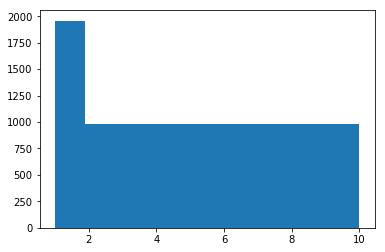

In [13]:
plt.hist(y_resampled)
plt.show()

In [14]:
clf = svm.SVC(decision_function_shape='ovo', random_state=42, C=C_)
clf.fit(X_resampled, y_resampled)

SVC(C=2.9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

        1.0       0.74      0.85      0.79       220
        2.0       0.57      0.63      0.60        68
        3.0       0.71      0.59      0.65        34
        4.0       0.61      0.52      0.56        21
        5.0       0.31      0.21      0.25        24
        6.0       0.45      0.39      0.42        23
        7.0       0.00      0.00      0.00        12
        8.0       0.64      0.53      0.58        17
        9.0       0.29      0.18      0.22        11
       10.0       0.50      0.14      0.22         7

avg / total       0.62      0.65      0.63       437



In [16]:
clf.score(X_test,y_test)

0.65446224256292906

In [17]:
scores = cross_val_score(clf, X_train, y_train, cv=5).mean()

In [18]:
#now used 70% of data for training. When using 100% this score is 0.663 instead of 0.648. 
#This indicates that the model benefits from more data. 
print(scores)

0.665824378191


In [19]:
#when using all resampled data, there is a lot of overfitting
scores_res = cross_val_score(clf, X_resampled, y_resampled, cv=5).mean()
print(scores_res)

0.946701999089


Try underfitting method. This performs really bad cause it decreases samples of classes to the number of samples in the smallest class which is around 80

In [22]:
us = NearMiss(ratio=0.8, size_ngh=3, version=2)

In [23]:
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

/home/tinka/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/tinka/anaconda3/lib/python3.6/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'size_ngh' is deprecated from 0.2 and will be removed in 0.4. Use 'n_neighbors' instead.
  category=DeprecationWarning)
/home/tinka/anaconda3/lib/python3.6/site-packages/imblearn/under_sampling/prototype_selection/nearmiss.py:211: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn('The number of the samples to be selected is larger'


In [25]:
print(X_train_res.shape)

(944, 264)


(array([ 98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  81.,  79.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

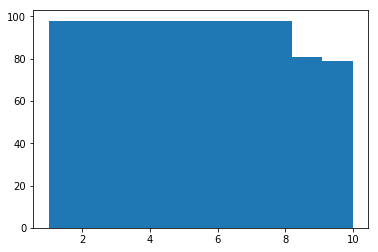

In [26]:
plt.hist(y_train_res)

In [27]:
clf = svm.SVC(decision_function_shape='ovo', random_state=42, C=C_)
clf.fit(X_train_res,y_train_res)

SVC(C=2.9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

        1.0       0.50      0.04      0.08       220
        2.0       0.75      0.35      0.48        68
        3.0       0.52      0.44      0.48        34
        4.0       0.41      0.33      0.37        21
        5.0       0.17      0.17      0.17        24
        6.0       0.44      0.30      0.36        23
        7.0       0.03      0.17      0.05        12
        8.0       0.30      0.53      0.38        17
        9.0       0.14      0.45      0.22        11
       10.0       0.01      0.29      0.02         7

avg / total       0.48      0.19      0.22       437



In [29]:
clf.score(X_test,y_test)

0.19221967963386727

Try SMOTETomek, which is a combination of under and overfitting

In [30]:
os_us = SMOTETomek(ratio=0.8, k=5)
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

/home/tinka/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/tinka/anaconda3/lib/python3.6/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
/home/tinka/anaconda3/lib/python3.6/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)


(array([ 1958.,  1566.,  1566.,  1566.,  1566.,  1566.,  1566.,  1566.,
         1566.,  1566.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

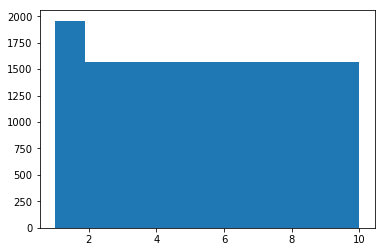

In [31]:
plt.hist(y_train_res)

In [32]:
clf = svm.SVC(decision_function_shape='ovo', random_state=42, C=C_)
clf.fit(X_train_res,y_train_res)

SVC(C=2.9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

        1.0       0.74      0.86      0.80       220
        2.0       0.61      0.63      0.62        68
        3.0       0.66      0.56      0.60        34
        4.0       0.50      0.57      0.53        21
        5.0       0.27      0.12      0.17        24
        6.0       0.40      0.35      0.37        23
        7.0       0.00      0.00      0.00        12
        8.0       0.64      0.53      0.58        17
        9.0       0.33      0.18      0.24        11
       10.0       0.50      0.14      0.22         7

avg / total       0.62      0.66      0.63       437



In [34]:
clf.score(X_test,y_test)

0.65675057208237986

In [35]:
scores = cross_val_score(clf, X_train, y_train, cv=5).mean()

In [36]:
print(scores)

0.665824378191


In [37]:
scores_res = cross_val_score(clf, X_resampled, y_resampled, cv=5).mean()
print(scores_res)

0.946701999089


In [41]:
ypred=clf.predict(x_predict)

In [42]:
ypred.shape

(6544,)

In [44]:
subm = pd.DataFrame(ypred, columns=['Sample_label'])
subm.index += 1
subm = subm.astype(int)
subm.to_csv('Solutions/svm_SMOTET_omek_2411.csv',
            index_label='Sample_id')